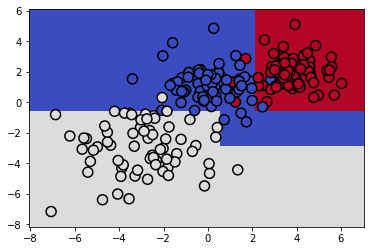

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

# Задача 5.2.3

1 point possible (graded)

Обучите на предложенных данных решающее дерево. 

Целевой переменной здесь является переменная Class. 

Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. 

Максимальную глубину дерева примите за 3, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2. 

Какое значение f1-score вы получили? 

Округлите до трёх знаков после точки-разделителя.

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
dataset_url='https://lms.skillfactory.ru/assets/courseware/v1/ad29ebf5005123a0f5f50399a7bb64fb/asset-v1:Skillfactory+DST-8+13NOV2019+type@asset+block/bill_authentication.csv'
orig_df = pd.read_csv(dataset_url, low_memory = False)

In [99]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [101]:
X = orig_df[list(set(orig_df.columns) - set(['Class']))]
y = orig_df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 17)

In [104]:
RANDOM_SEED = 139
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2, min_samples_leaf=5, random_state=RANDOM_SEED)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=139, splitter='best')

In [106]:
y_pred = clf_tree.predict(X_test)
from sklearn.metrics import f1_score
round(f1_score(y_test, y_pred), 3)

0.838

!!! valid_answer: 0.866

## Задача 5.2.4

1 point possible (graded)

Проклассифицируйте банкноту с вектором признаков 2.04378,-0.38422,1.437292,0.76421. 

К какому классу она относится?

In [46]:
sample = np.array([2.04378,-0.38422,1.437292,0.76421])

In [47]:
clf_tree.predict(sample.reshape(1, -1))

array([0])

# РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

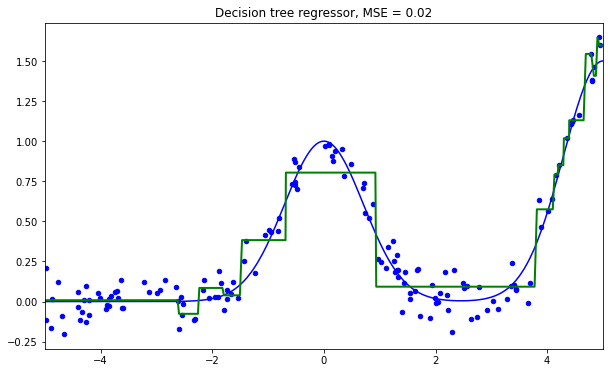

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()

## Задача 5.2.5

1/1 point (graded)

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева. 

Вычислите RMSE, округлите до двух знаков после точки-разделителя.

In [107]:
dataset_url='https://lms.skillfactory.ru/assets/courseware/v1/fc8c2fb45f3b0b86d8fe409ff0f430af/asset-v1:Skillfactory+DST-8+13NOV2019+type@asset+block/petrol_consumption.csv'
orig_df = pd.read_csv(dataset_url, low_memory = False)

In [108]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [109]:
orig_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [110]:
X = orig_df[list(set(orig_df.columns) - set(['Petrol_Consumption']))]
y = orig_df['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [130]:
from sklearn.tree import DecisionTreeRegressor

RANDOM_SEED = 139
reg_tree = DecisionTreeRegressor(max_depth=11,random_state=RANDOM_SEED)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=139, splitter='best')

In [131]:
y_pred = reg_tree.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
round(np.sqrt(mse(y_test, y_pred)), 2)

103.84

!!! valid answer: 87.97

In [159]:
# dataset_url='https://lms.skillfactory.ru/assets/courseware/v1/d0fbc50b6db2d2b782a246ff620500f2/asset-v1:Skillfactory+DST-8+13NOV2019+type@asset+block/winequality-red.csv'
orig_df = pd.read_csv('./data/winequality-red.csv', sep=';')

In [160]:
orig_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [174]:
orig_df['good'] = orig_df.apply(lambda row: 1 if row.quality >= 6 else 0, axis=1)
X = orig_df[list(set(orig_df.columns) - set(['quality', 'good']))]
y = orig_df['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [179]:
RANDOM_SEED = 42
tree_clsf = DecisionTreeClassifier(max_depth=10,random_state=RANDOM_SEED)
tree_clsf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [181]:
y_pred = tree_clsf.predict(X_test)
round(f1_score(y_test, y_pred), 3)

0.78

valid answer: 0.793

In [184]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000) 
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
round(f1_score(y_test, y_pred), 3)

0.745

In [189]:
from sklearn.ensemble import BaggingClassifier
bgg = BaggingClassifier(random_state=42, n_estimators=1500)
bgg.fit(X_train, y_train)
y_pred = bgg.predict(X_test)
round(f1_score(y_test, y_pred), 3)

0.819

valid answer: 0.818

In [190]:
dataset_url = 'https://lms.skillfactory.ru/assets/courseware/v1/ecd07340ed6b98d6fb556b3429156eb4/asset-v1:Skillfactory+DST-8+13NOV2019+type@asset+block/temps_extended.csv'
orig_df = pd.read_csv(dataset_url, low_memory = False)

In [191]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2191 non-null   int64  
 1   month    2191 non-null   int64  
 2   day      2191 non-null   int64  
 3   weekday  2191 non-null   object 
 4   ws_1     2191 non-null   float64
 5   prcp_1   2191 non-null   float64
 6   snwd_1   2191 non-null   int64  
 7   temp_2   2191 non-null   int64  
 8   temp_1   2191 non-null   int64  
 9   average  2191 non-null   float64
 10  actual   2191 non-null   int64  
 11  friend   2191 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 205.5+ KB


In [192]:
orig_df.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [195]:
weather = orig_df
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train,Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

In [196]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [202]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_val)
from sklearn.metrics import mean_squared_error as mse
mse(Y_val, Y_pred)

25.10161094224924

In [197]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [198]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   53.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [199]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [204]:
rf_opt = RandomForestRegressor(random_state = 42,n_estimators=1600,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',bootstrap=True)
rf_opt.fit(X_train, Y_train)
Y_pred = rf_opt.predict(X_val)
from sklearn.metrics import mean_squared_error as mse
mse(Y_val, Y_pred)

23.18588784752232

In [205]:
25.10161094224924 - 23.18588784752232

1.9157230947269213

In [206]:
dataset_url='https://lms.skillfactory.ru/assets/courseware/v1/8dd3362700988d469792f2aa7a5fdcc4/asset-v1:Skillfactory+DST-8+13NOV2019+type@asset+block/HR-dataset.csv'
orig_df = pd.read_csv(dataset_url, low_memory = False)
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   dept                   14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [212]:
df=orig_df.copy()

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')
